In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bartlett, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

import warnings
warnings.filterwarnings("ignore")

## Step One
---

#### Read in your data

In [4]:
### start code
df = pd.read_csv('https://raw.githubusercontent.com/woz-u/DS-Student-Resources/main/DS105-Intermediate-Statistics/Data/avocados.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
### start code
df = pd.read_csv('https://raw.githubusercontent.com/woz-u/DS-Student-Resources/main/DS105-Intermediate-Statistics/Data/avocados.csv')
df = df.iloc[:,1:]
df.head()
### end code

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Data wrangling

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
seasons = [1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1]
month_to_season = dict(zip(range(1,13), seasons))
month_to_season
df['Season'] = df["Date"].dt.month.replace(month_to_season)


In [7]:
df['region'] = df['region'].replace(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
                                     'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
                                     'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'],
                                    
                                   ['Albany', 'Atlanta', 'Baltimore', 'Boise', 'Boston',
       'Buffalo', 'California', 'Charlotte', 'Chicago',
       'Cincinnati', 'Columbus', 'Dallas', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Scranton',
       'Hartford', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'Phoenix', 'Pittsburgh', 'Plains', 'Portland',
       'Raleigh', 'Richmond', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'SouthCentral', 'Southeast', 'Spokane', 'St. Louis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'New Mexico'])

In [8]:
df['state'] = df['region'].replace(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
                                     'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
                                     'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'],
                                    
                                   ['New York', 'Georgia', 'Maryland', 'Idaho', 'Massachusetts',
       'New York', 'California', 'North Carolina', 'Illinois',
       'Ohio', 'Ohio', 'Texas', 'Colorado',
       'Michigan', 'Michigan', 'Illinois', 'Ohio',
       'Connecticut', 'Texas', 'Indiana', 'Florida',
       'Nevada', 'California', 'Kentucky', 'Florida',
       'Midsouth', 'Tennessee', 'Louisiana', 'New York',
       'Northeast', 'NorthernNewEngland', 'Florida', 'Pennsylvania',
       'Arizona', 'Pennsylvania', 'New York', 'Oregon',
       'North Carolina', 'Virginia', 'Virginia', 'California',
       'California', 'California', 'Washington', 'South Carolina',
       'SouthCentral', 'Southeast', 'Washington', 'Missouri', 'New York',
       'Florida', 'TotalUS', 'West', 'New Mexico'])

In [9]:
df['cost'] = np.round(df["Total Volume"] * df["AveragePrice"],2)

In [10]:
df.to_csv("avocados_with_state.csv",index=False)

In [11]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Season,state,cost
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,1,New York,85434.70
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,1,New York,74083.92
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,1,New York,109944.80
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,1,New York,85311.52
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,4,New York,65330.69


## Step Two - Exploratory Data Analysis
---
#### Check number of rows and columns

In [12]:
df.shape

(18249, 16)

In [13]:
print(f'Rows: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')

Rows: 18249
Columns: 16


## Step Three
---

In [14]:
#print unique values for type column
df.type.unique()

array(['conventional', 'organic'], dtype=object)

In [15]:
df.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [16]:
df.region.value_counts()

Albany                338
Sacramento            338
Northeast             338
NorthernNewEngland    338
Orlando               338
Philadelphia          338
Phoenix               338
Pittsburgh            338
Plains                338
Portland              338
Raleigh               338
Richmond              338
Roanoke               338
San Diego             338
Atlanta               338
San Francisco         338
Seattle               338
South Carolina        338
SouthCentral          338
Southeast             338
Spokane               338
St. Louis             338
Syracuse              338
Tampa                 338
TotalUS               338
West                  338
NewYork               338
NewOrleansMobile      338
Nashville             338
Midsouth              338
Baltimore             338
Boise                 338
Boston                338
Buffalo               338
California            338
Charlotte             338
Chicago               338
Cincinnati            338
Columbus    

In [17]:
#print unique values for region column
df.region.unique()

array(['Albany', 'Atlanta', 'Baltimore', 'Boise', 'Boston', 'Buffalo',
       'California', 'Charlotte', 'Chicago', 'Cincinnati', 'Columbus',
       'Dallas', 'Denver', 'Detroit', 'Grand Rapids', 'Great Lakes',
       'Scranton', 'Hartford', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami', 'Midsouth',
       'Nashville', 'NewOrleansMobile', 'NewYork', 'Northeast',
       'NorthernNewEngland', 'Orlando', 'Philadelphia', 'Phoenix',
       'Pittsburgh', 'Plains', 'Portland', 'Raleigh', 'Richmond',
       'Roanoke', 'Sacramento', 'San Diego', 'San Francisco', 'Seattle',
       'South Carolina', 'SouthCentral', 'Southeast', 'Spokane',
       'St. Louis', 'Syracuse', 'Tampa', 'TotalUS', 'West', 'New Mexico'],
      dtype=object)

In [18]:
df.region.describe()

count      18249
unique        54
top       Albany
freq         338
Name: region, dtype: object

In [19]:
df.AveragePrice.describe()

count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64

## Step Four - Data Wrangling
---
#### Filter for 3 cities
Focusing on the Three Categories
The data has many more categories than three, so you will need to filter the dataset by the categories you want. The code below makes a list of the categories you want to keep, then searches through the Category column using the isin() function to keep only those that match.



In [49]:
df1 = df[df.region.isin(['Tampa', 'Columbus', 'Chicago'])]
df1.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Season,state,cost
416,2015-12-27,0.93,661137.13,42799.00,445218.79,78378.25,94741.09,83066.75,1617.67,10056.67,conventional,2015,Chicago,1,Illinois,614857.53
417,2015-12-20,0.91,690669.34,35724.99,464574.15,96306.30,94063.90,76241.25,9592.65,8230.00,conventional,2015,Chicago,1,Illinois,628509.10
418,2015-12-13,1.07,668601.50,40380.09,451470.42,94162.53,82588.46,76829.42,5693.75,65.29,conventional,2015,Chicago,1,Illinois,715403.61
419,2015-12-06,1.14,664020.49,53173.18,455048.11,92888.37,62910.83,62473.12,420.95,16.76,conventional,2015,Chicago,1,Illinois,756983.36
420,2015-11-29,1.11,602481.22,42851.47,422479.32,74988.97,62161.46,61862.57,298.89,0.00,conventional,2015,Chicago,4,Illinois,668754.15


In [50]:
df1.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Season,state,cost
18208,2018-02-04,1.32,7363.56,89.59,440.31,0.0,6833.66,6827.78,5.88,0.0,organic,2018,Tampa,1,Florida,9719.90
18209,2018-01-28,1.61,7695.89,156.01,859.20,0.0,6680.68,5567.39,1113.29,0.0,organic,2018,Tampa,1,Florida,12390.38
18210,2018-01-21,1.52,6871.05,76.66,407.09,0.0,6387.30,6375.55,11.75,0.0,organic,2018,Tampa,1,Florida,10444.00
18211,2018-01-14,1.53,7238.04,106.98,496.61,0.0,6634.45,6634.45,0.00,0.0,organic,2018,Tampa,1,Florida,11074.20
18212,2018-01-07,1.51,7370.53,42.17,400.58,0.0,6927.78,6921.12,6.66,0.0,organic,2018,Tampa,1,Florida,11129.50


In [51]:
df1.region.describe()

count        1014
unique          3
top       Chicago
freq          338
Name: region, dtype: object

In [52]:
df1.region.value_counts()

Chicago     338
Columbus    338
Tampa       338
Name: region, dtype: int64

## Step Five - Data Wrangling
---
#### recode 'type' and 'region' columns

In [53]:
def recode(series):
    if series == 'conventional':
        return 0
    if series == 'organic':
        return 1
    
df1['typeR'] = df1['type'].apply(recode)

In [54]:
df1.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Season,state,cost,typeR
416,2015-12-27,0.93,661137.13,42799.00,445218.79,78378.25,94741.09,83066.75,1617.67,10056.67,conventional,2015,Chicago,1,Illinois,614857.53,0
417,2015-12-20,0.91,690669.34,35724.99,464574.15,96306.30,94063.90,76241.25,9592.65,8230.00,conventional,2015,Chicago,1,Illinois,628509.10,0
418,2015-12-13,1.07,668601.50,40380.09,451470.42,94162.53,82588.46,76829.42,5693.75,65.29,conventional,2015,Chicago,1,Illinois,715403.61,0
419,2015-12-06,1.14,664020.49,53173.18,455048.11,92888.37,62910.83,62473.12,420.95,16.76,conventional,2015,Chicago,1,Illinois,756983.36,0
420,2015-11-29,1.11,602481.22,42851.47,422479.32,74988.97,62161.46,61862.57,298.89,0.00,conventional,2015,Chicago,4,Illinois,668754.15,0


In [55]:
df1.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Season,state,cost,typeR
18208,2018-02-04,1.32,7363.56,89.59,440.31,0.0,6833.66,6827.78,5.88,0.0,organic,2018,Tampa,1,Florida,9719.90,1
18209,2018-01-28,1.61,7695.89,156.01,859.20,0.0,6680.68,5567.39,1113.29,0.0,organic,2018,Tampa,1,Florida,12390.38,1
18210,2018-01-21,1.52,6871.05,76.66,407.09,0.0,6387.30,6375.55,11.75,0.0,organic,2018,Tampa,1,Florida,10444.00,1
18211,2018-01-14,1.53,7238.04,106.98,496.61,0.0,6634.45,6634.45,0.00,0.0,organic,2018,Tampa,1,Florida,11074.20,1
18212,2018-01-07,1.51,7370.53,42.17,400.58,0.0,6927.78,6921.12,6.66,0.0,organic,2018,Tampa,1,Florida,11129.50,1


In [56]:
df1.typeR.value_counts()

0    507
1    507
Name: typeR, dtype: int64

In [57]:
def recode(series):
    if series == 'Chicago':
        return 0
    if series == 'Tampa':
        return 1
    if series == 'Columbus':
        return 2
    
df1['regionR'] = df1['region'].apply(recode)

In [58]:
df1.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Season,state,cost,typeR,regionR
416,2015-12-27,0.93,661137.13,42799.00,445218.79,78378.25,94741.09,83066.75,1617.67,10056.67,conventional,2015,Chicago,1,Illinois,614857.53,0,0
417,2015-12-20,0.91,690669.34,35724.99,464574.15,96306.30,94063.90,76241.25,9592.65,8230.00,conventional,2015,Chicago,1,Illinois,628509.10,0,0
418,2015-12-13,1.07,668601.50,40380.09,451470.42,94162.53,82588.46,76829.42,5693.75,65.29,conventional,2015,Chicago,1,Illinois,715403.61,0,0
419,2015-12-06,1.14,664020.49,53173.18,455048.11,92888.37,62910.83,62473.12,420.95,16.76,conventional,2015,Chicago,1,Illinois,756983.36,0,0
420,2015-11-29,1.11,602481.22,42851.47,422479.32,74988.97,62161.46,61862.57,298.89,0.00,conventional,2015,Chicago,4,Illinois,668754.15,0,0


In [59]:
df1.regionR.unique()

array([0, 2, 1])

In [60]:
df1.regionR.value_counts()

0    338
2    338
1    338
Name: regionR, dtype: int64

In [62]:
df1.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Season,state,cost,typeR,regionR
416,2015-12-27,0.93,661137.13,42799.00,445218.79,78378.25,94741.09,83066.75,1617.67,10056.67,conventional,2015,Chicago,1,Illinois,614857.53,0,0
417,2015-12-20,0.91,690669.34,35724.99,464574.15,96306.30,94063.90,76241.25,9592.65,8230.00,conventional,2015,Chicago,1,Illinois,628509.10,0,0
418,2015-12-13,1.07,668601.50,40380.09,451470.42,94162.53,82588.46,76829.42,5693.75,65.29,conventional,2015,Chicago,1,Illinois,715403.61,0,0
419,2015-12-06,1.14,664020.49,53173.18,455048.11,92888.37,62910.83,62473.12,420.95,16.76,conventional,2015,Chicago,1,Illinois,756983.36,0,0
420,2015-11-29,1.11,602481.22,42851.47,422479.32,74988.97,62161.46,61862.57,298.89,0.00,conventional,2015,Chicago,4,Illinois,668754.15,0,0


## Step Six
---
#### Test for assumptions

- Normality
- Homogeneity of Variance
- Sample Size > 20
- Independence
- Sphercity

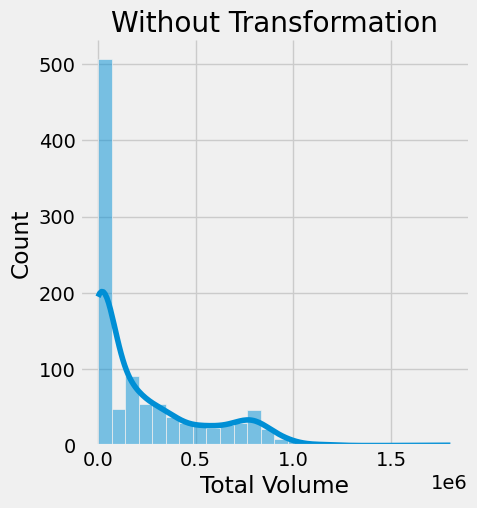

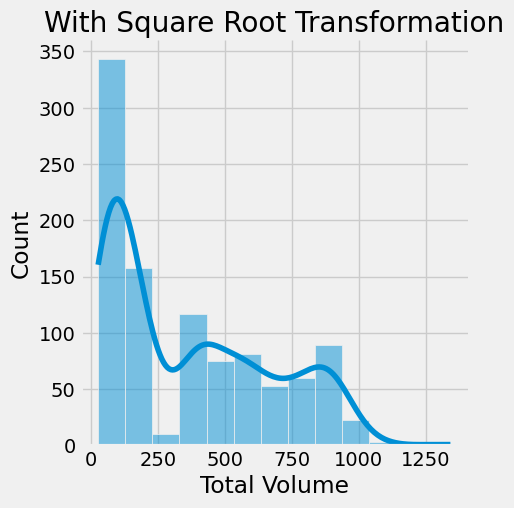

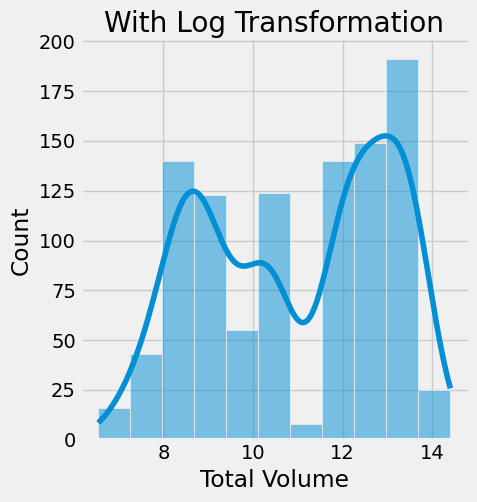

In [63]:
plt.style.use('fivethirtyeight')

#Without Transformation
sns.displot(df1['Total Volume'], kde = True).set(title='Without Transformation')

#With Square Root Transformation
sns.displot(np.sqrt(df1['Total Volume']), kde = True).set(title='With Square Root Transformation')

#With Log Transformation
sns.displot(np.log(df1['Total Volume']), kde = True).set(title='With Log Transformation')

In [64]:
#perform log transformation
df1['Total Volume_log'] = np.log(df1['Total Volume'])

In [65]:
bartlett(df1["Total Volume_log"], df1["regionR"])

BartlettResult(statistic=740.6290790556229, pvalue=4.375162384804222e-163)

In [66]:
bartlett(df1["Total Volume"], df1["regionR"])

BartlettResult(statistic=24455.29021244944, pvalue=0.0)

In [67]:
#explain your results
#You are looking for a non-significant test. The null hypothesis for both of these is that the data has equal variance, so you'd like to have a p value of > .05.
#The p value associated with this test is < .05, which means that unfortunately, you have violated the assumption of homogeneity of variance. However, we know that each city doesn't
#impact the other cities chosen.  So we will move ahead. 




In [68]:
#Sample size: must have a least 20 cases per independent variable
#Independence: no overlap between your groups and that the levels you are testing are not related in some way
#Sphericity: (for between subjects designs only, usually when you are dealing with the same variables at different times)

In [69]:
f_oneway(
    df1["Total Volume"][df1["regionR"]== 0],
    df1["Total Volume"][df1["regionR"]== 1],
    df1["Total Volume"][df1["regionR"]== 2]
)

F_onewayResult(statistic=123.60510269268313, pvalue=9.47250432206317e-49)

In [70]:
#explain your results
#Since the p value is less than .05, there is a significant difference in between these three categories.


In [71]:
postHocResults = MultiComparison(df1["Total Volume_log"], df1["region"]).tukeyhsd()
print(postHocResults)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
 Chicago Columbus  -1.4653    0.0 -1.8105   -1.12   True
 Chicago    Tampa  -1.3905    0.0 -1.7357 -1.0452   True
Columbus    Tampa   0.0748 0.8672 -0.2705  0.4201  False
--------------------------------------------------------


In [72]:
postHocResults = MultiComparison(df1["Total Volume"], df1["region"]).tukeyhsd()
print(postHocResults)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
 group1   group2    meandiff   p-adj    lower        upper     reject
---------------------------------------------------------------------
 Chicago Columbus -306831.2932   0.0 -353343.1671 -260319.4192   True
 Chicago    Tampa -200289.3467   0.0 -246801.2207 -153777.4728   True
Columbus    Tampa  106541.9464   0.0   60030.0725  153053.8204   True
---------------------------------------------------------------------


#### Interpret or explain your results:
This output provides you with the mean difference in the number of reviews per comparison, plus the confidence interval (lower and upper columns), 
and whether or not you can reject the null hypothesis. If the value in the reject column is True, then this means there was a significant difference in the means between those groups. 

So, there is a significant difference between the consumption of Avocados in Chicago.
Although Tampa and Columbus have a very similar rate of consumption

Go on to step 7 to find out what the differences are: 


## Step Seven: Determine Means and Draw Conclusions
---

In [73]:
df2 = df1[['region', 'Total Volume']]

df2.groupby('region').mean().round(2)

,Total Volume
region,
Chicago,395569.05
Columbus,88737.76
Tampa,195279.70


In [ ]:
#explain your results
#There is a significant difference in Chicago's consumption.  
#They consumes the most avocados, more than 4 times what Columbus consumes,
#as well as double what Boston consumes. 



In [81]:
df1.to_csv("/Users/nijhaen/Desktop/Entity/DSO110" + "AvocadosPyth.csv")